In [ ]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.5 MB/s 


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDOneClassSVM
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, average_precision_score
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.kernel_approximation import Nystroem

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/train_df.csv")
test_df = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/test_df.csv")

In [ ]:
train_df.head()

,NPI,Tot_Benes_Mean,Tot_Srvcs_Mean,Tot_Bene_Day_Srvcs_Mean,Avg_Sbmtd_Chrg_Mean,Avg_Mdcr_Alowd_Amt_Mean,Avg_Mdcr_Pymt_Amt_Mean,Is_Fraud,Is_Male,Tot_Suplrs_Mean,...,Surgical Oncology,Thoracic Surgery,Undefined Physician type,Undersea and Hyperbaric Medicine,Urology,Vascular Surgery,Opioid_Tot_Drug_Cst_Missing,Opioid_Tot_Suply_Missing,Opioid_LA_Tot_Drug_Cst_Missing,Opioid_LA_Tot_Suply_Missing
0,1942294194,60.642857,96.642857,96.642857,216.477855,95.394587,74.656983,0.0,1.0,2.000000,...,0,0,0,0,0,0,0.0,0.0,1.0,1.0
1,1508965187,29.333333,32.833333,31.083333,463.666667,125.811621,99.238639,0.0,0.0,2.750000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,1992790315,28.000000,42.666667,42.666667,23.737179,7.180476,6.156374,0.0,1.0,9.000000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,1538164637,177.828571,259.485714,245.971429,277.273075,90.160440,68.922831,0.0,1.0,3.666667,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
4,1336368661,43.653846,82.480769,65.807692,818.563984,261.450147,207.475945,0.0,1.0,1.600000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,NPI,Tot_Benes_Mean,Tot_Srvcs_Mean,Tot_Bene_Day_Srvcs_Mean,Avg_Sbmtd_Chrg_Mean,Avg_Mdcr_Alowd_Amt_Mean,Avg_Mdcr_Pymt_Amt_Mean,Is_Fraud,Is_Male,Tot_Suplrs_Mean,...,Surgical Oncology,Thoracic Surgery,Undefined Physician type,Undersea and Hyperbaric Medicine,Urology,Vascular Surgery,Opioid_Tot_Drug_Cst_Missing,Opioid_Tot_Suply_Missing,Opioid_LA_Tot_Drug_Cst_Missing,Opioid_LA_Tot_Suply_Missing
0,1457324451,55.882353,83.000000,83.000000,120.765463,84.332661,74.155972,0.0,1.0,3.800000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1588751523,83.478261,94.652174,93.913043,340.594074,170.506351,131.423367,0.0,1.0,15.000000,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0
2,1437224128,61.666667,104.083333,100.500000,88.813892,45.756816,39.846102,0.0,1.0,12.500000,...,0,0,0,0,0,0,0.0,0.0,1.0,1.0
3,1689683864,24.142857,42.142857,42.142857,86.281071,68.183827,59.052302,0.0,1.0,5.666667,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0
4,1215028956,124.742857,264.714286,245.800000,136.861692,96.403404,79.341149,0.0,1.0,9.000000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
print(train_df["Is_Fraud"].value_counts())
print(test_df["Is_Fraud"].value_counts())

0.0    210665
1.0        85
Name: Is_Fraud, dtype: int64
0.0    52667
1.0       21
Name: Is_Fraud, dtype: int64


# Data Preprocessing

In [ ]:
X_train, y_train = train_df.drop(columns=["NPI", "Is_Fraud"]), train_df["Is_Fraud"]
X_test, y_test = test_df.drop(columns=["NPI", "Is_Fraud"]), test_df["Is_Fraud"]

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train.head()

,Tot_Benes_Mean,Tot_Srvcs_Mean,Tot_Bene_Day_Srvcs_Mean,Avg_Sbmtd_Chrg_Mean,Avg_Mdcr_Alowd_Amt_Mean,Avg_Mdcr_Pymt_Amt_Mean,Is_Male,Tot_Suplrs_Mean,Tot_Suplr_Benes_Mean,Tot_Suplr_Clms_Mean,...,Surgical Oncology,Thoracic Surgery,Undefined Physician type,Undersea and Hyperbaric Medicine,Urology,Vascular Surgery,Opioid_Tot_Drug_Cst_Missing,Opioid_Tot_Suply_Missing,Opioid_LA_Tot_Drug_Cst_Missing,Opioid_LA_Tot_Suply_Missing
0,-0.162963,-0.149922,-0.177403,-0.133186,0.046098,0.052374,0.814238,-0.578714,-0.487935,0.011593,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,1.365610,1.365610
1,-0.877559,-0.299360,-0.840665,0.480401,0.470132,0.484953,-1.228141,-0.362674,-0.487935,-0.384234,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
2,-0.907990,-0.276331,-0.723477,-0.611618,-1.183664,-1.153075,0.814238,1.437659,-0.014554,-0.087364,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
3,2.511633,0.231446,1.333345,0.017724,-0.026869,-0.048533,0.814238,-0.098625,-0.119750,0.105837,...,-0.030197,-0.035078,-0.020205,-0.015558,6.203312,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
4,-0.550713,-0.183089,-0.489360,1.361349,2.361022,2.389675,0.814238,-0.693936,-0.119750,-0.387061,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273


# OneClassSVM

## Gridsearch - Different Kernal Approximations

In [ ]:
svm_pipe = Pipeline([
    ('kernel', Nystroem(random_state=42)),
    ('svm', SGDOneClassSVM(random_state=42, average=True))
])

svm_param_grid = {
    'kernel': [Nystroem(random_state=42, kernel='linear'), 
               Nystroem(random_state=42, kernel='rbf'),
               Nystroem(random_state=42, kernel='sigmoid'),
               Nystroem(random_state=42, kernel='poly', degree=3),
               Nystroem(random_state=42, kernel='poly', degree=6),
               Nystroem(random_state=42, kernel='poly', degree=9)
             ]
}

svm_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
%load_ext autotime

time: 436 µs (started: 2022-11-18 05:48:21 +00:00)


In [ ]:
clf_svm = GridSearchCV(svm_pipe, svm_param_grid, cv=svm_kfold, scoring='average_precision', n_jobs=-1)
clf_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('kernel', Nystroem(random_state=42)),
                                       ('svm',
                                        SGDOneClassSVM(average=True,
                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'kernel': [Nystroem(kernel='linear', random_state=42),
                                    Nystroem(random_state=42),
                                    Nystroem(kernel='sigmoid', random_state=42),
                                    Nystroem(degree=3, kernel='poly',
                                             random_state=42),
                                    Nystroem(degree=6, kernel='poly',
                                             random_state=42),
                                    Nystroem(degree=9, kernel='poly',
                                             random_state=42)]},
     

time: 1min 2s (started: 2022-11-18 05:48:22 +00:00)


In [ ]:
print(clf_svm.best_params_)
print(clf_svm.best_score_)

{'kernel': Nystroem(kernel='linear', random_state=42)}
0.0013299803884663896
time: 14 ms (started: 2022-11-18 05:49:25 +00:00)


## Best Model

In [ ]:
svm_best = Pipeline([
    ('kernel', Nystroem(random_state=42, kernel='linear')),
    ('svm', SGDOneClassSVM(random_state=42, average=True))
])
svm_best.fit(X_train, y_train)

Pipeline(steps=[('kernel', Nystroem(kernel='linear', random_state=42)),
                ('svm', SGDOneClassSVM(average=True, random_state=42))])

time: 1.61 s (started: 2022-11-18 05:50:36 +00:00)


In [ ]:
y_pred = svm_best.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]

cf_matrix = confusion_matrix(y_test, y_pred)

time: 396 ms (started: 2022-11-18 05:50:41 +00:00)


In [ ]:
y_pred_train = svm_best.predict(X_train)
y_pred_train = [1 if i==-1 else 0 for i in y_pred_train]

time: 938 ms (started: 2022-11-18 05:50:42 +00:00)


In [ ]:
%unload_ext autotime

## Evaluation of Model

Text(33.0, 0.5, 'Ground Truth')

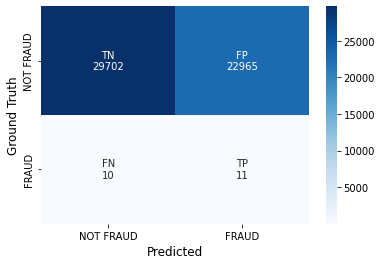

In [ ]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels_baseline = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cf_matrix, annot=labels_baseline, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'])
s.set_xlabel("Predicted", fontsize=12)
s.set_ylabel("Ground Truth", fontsize=12)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72     52667
         1.0       0.00      0.52      0.00        21

    accuracy                           0.56     52688
   macro avg       0.50      0.54      0.36     52688
weighted avg       1.00      0.56      0.72     52688



In [ ]:
#Train Result
svm_score_train = svm_best.score_samples(X_train)
svm_precision_train, svm_recall_train, _ = precision_recall_curve(y_train, svm_score_train)

ROC_AUC_train = round(roc_auc_score(y_train, svm_score_train),5)
PR_AUC_train = round(auc(svm_recall_train, svm_precision_train),5)
FPR_train = round(1-recall_score(y_train, y_pred_train, pos_label=0),5) #1-specificity
recall_train = round(recall_score(y_train, y_pred_train, pos_label=1),5)
precision_train = round(precision_score(y_train, y_pred_train, pos_label=1),5)

print("TRAIN ROC_AUC: {}".format(ROC_AUC_train))
print("TRAIN PR_AUC: {}".format(PR_AUC_train))
print("TRAIN FPR: {}".format(FPR_train))
print("TRAIN Recall: {}".format(recall_train))
print("TRAIN Precision: {}".format(precision_train))

TRAIN ROC_AUC: 0.53156
TRAIN PR_AUC: 0.00084
TRAIN FPR: 0.43368
TRAIN Recall: 0.47059
TRAIN Precision: 0.00044


In [ ]:
#Test Result
svm_score_test = svm_best.score_samples(X_test)
svm_precision_test, svm_recall_test, _ = precision_recall_curve(y_test, svm_score_test)

ROC_AUC_test = round(roc_auc_score(y_test, svm_score_test),5)
PR_AUC_test = round(auc(svm_recall_test, svm_precision_test),5)
FPR_test = round(1-recall_score(y_test, y_pred, pos_label=0),5) #1-specificity
recall_test = round(recall_score(y_test, y_pred, pos_label=1),5)
precision_test = round(precision_score(y_test, y_pred, pos_label=1),5)

print("TEST ROC_AUC: {}".format(ROC_AUC_test))
print("TEST PR_AUC: {}".format(PR_AUC_test))
print("TEST FPR: {}".format(FPR_test))
print("TEST Recall: {}".format(recall_test))
print("TEST Precision: {}".format(precision_test))

TEST ROC_AUC: 0.50141
TEST PR_AUC: 0.00047
TEST FPR: 0.43604
TEST Recall: 0.52381
TEST Precision: 0.00048


# ROC AUC, PR AUC

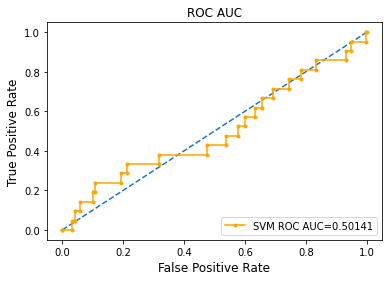

In [ ]:
svm_score = svm_best.score_samples(X_test)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svm_score_test)
lr_roc_auc = round(roc_auc_score(y_test, svm_score),5)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, thresholds = roc_curve(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(svm_fpr, svm_tpr, marker='.', label="SVM ROC AUC="+str(lr_roc_auc), color="orange")
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.title('ROC AUC')
plt.legend(loc=4)
plt.show()

SVM: PR AUC=0.001


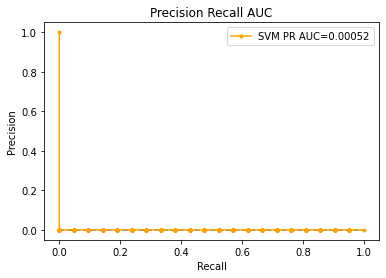

time: 289 ms (started: 2022-11-17 17:25:03 +00:00)


In [ ]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_score)
svm_pr_auc = round(average_precision_score(y_test, svm_score_test),5)
print('SVM: PR AUC=%.3f' % (svm_pr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(svm_recall, svm_precision, marker='.', label="SVM PR AUC="+str(round(svm_pr_auc,5)), color="orange")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall AUC')
plt.legend()
plt.show()